# Quick EDA

This dataset includes various property metrics crucial for analyzing real estate sales, features, and pricing.


| Variable Name   | Description                                                    |
|-----------------|----------------------------------------------------------------|
| BedroomAbvGr    | Bedrooms above grade (does NOT include basement bedrooms)      |
| KitchenAbvGr    | Kitchens above grade                                           |
| TotRmsAbvGrd    | Total rooms above grade (does not include bathrooms)           |
| Fireplaces      | Number of fireplaces                                           |
| GarageYrBlt     | Year garage was built                                          |
| GarageCars      | Size of garage in car capacity                                 |
| GarageArea      | Size of garage in square feet                                  |
| WoodDeckSF      | Wood deck area in square feet                                  |
| OpenPorchSF     | Open porch area in square feet                                 |
| EnclosedPorch   | Enclosed porch area in square feet                             |
| 3SsnPorch       | Three season porch area in square feet                         |
| ScreenPorch     | Screen porch area in square feet                               |
| PoolArea        | Pool area in square feet                                       |
| MiscVal         | Value of miscellaneous feature                                 |
| MoSold          | Month Sold (MM)                                                |
| YrSold          | Year Sold (YYYY)                                               |
| SalePrice       | Price of sale (target variable)                                |


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df_train =  pd.read_csv("data/module3_exercise_train.csv", sep=",", index_col='id')
df_test = pd.read_csv("data/module3_exercise_test.csv", sep=",", index_col='id')

In [8]:
df_train.head()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240


In [11]:
df_train.shape, df_test.shape

((1168, 17), (292, 16))

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

In [17]:
# missing values
df_train[df_train.isnull().any(axis=1)]


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


In [22]:
# duplicates
print("Only two rows are matching, it's probably a coincidence that they are the same")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())

Only two rows are matching, it's probably a coincidence that they are the same


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000



Histograms of numerical features:


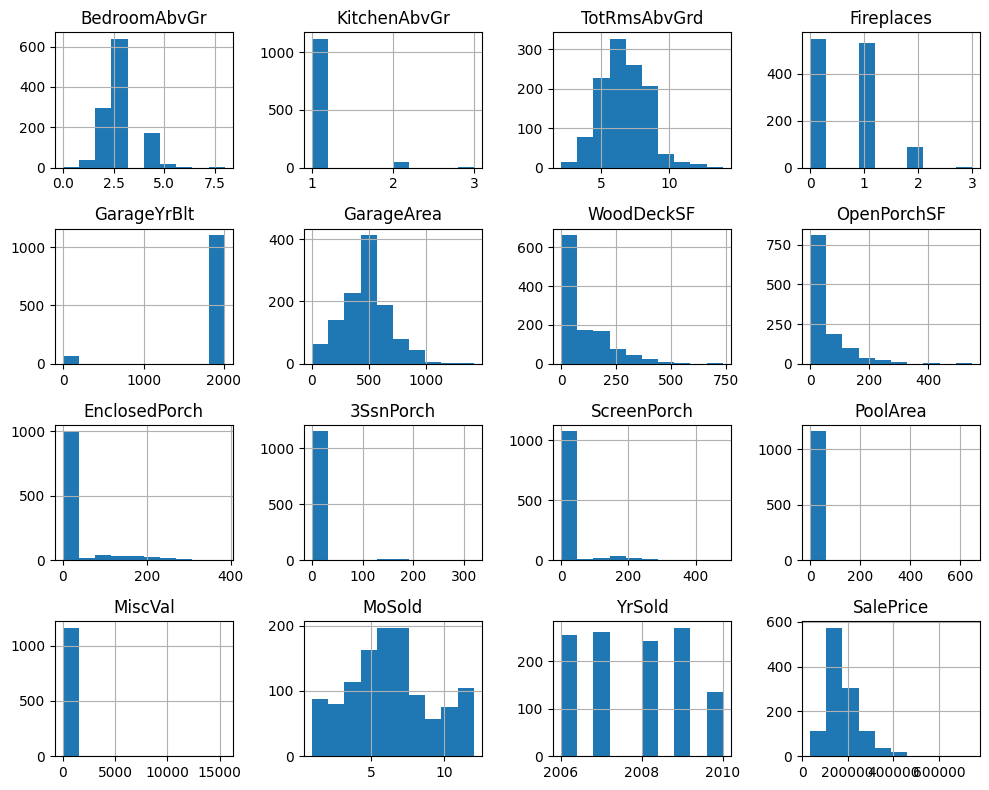

In [23]:
# Histograms for all numerical features
print("\nHistograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


Correlation matrix:


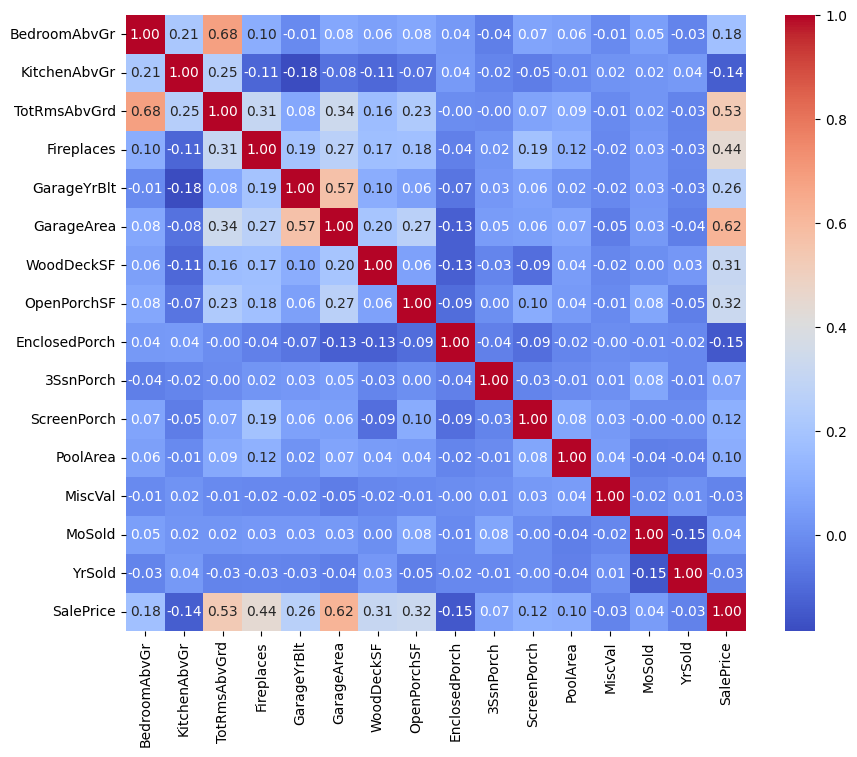

In [30]:
print("\nCorrelation matrix:")
# only the numerical features
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_train[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()